In [1]:
import networkx as nx
from scipy.sparse import linalg as scp_sla
import numpy as np
import matplotlib.pyplot as plt

import sim_lib.util as util
import sim_lib.graph_networkx as gnx
import sim_lib.attr_lib.util as attr_util
from sim_lib.attr_lib.formation import *
import sim_lib.attr_lib.vis as vis

In [2]:
params = {
    'context_count' : 8,
    'k' : 8,
    'attr_func' : attr_util.discrete_pareto_val, # attribute assignment function
    'edge_util_func' : attr_util.max_inv_frequency,
    'edge_proposal' : attr_util.const_one,
    'vtx_util' : attr_util.logistic,
    'edge_selection' : attr_util.seq_projection_edge_edit,
    'attr_copy' : attr_util.freq_attr_copy,
    'seed_type' : 'erdos_renyi', # Type of seed network
    'max_clique_size' : 10,
    'vtx_types' :
        {
            'wide' : { 'likelihood' : 1.0,
                      'struct_util' : attr_util.degree_util,
                      'color' : 'blue' },
            'tall' : { 'likelihood' : 0.0,
                      'struct_util' : attr_util.potential_density,
                      'color' : 'red' }
        }
}

In [3]:
def graph_density(G_nxc):
    denum = (len(G_nxc.nodes) * (len(G_nxc.nodes) - 1))
    num = sum([ G_nxc.degree[v] for v in G_nxc.nodes])
    return num / denum

def second_eigv(G_nx):
    laplacian = nx.linalg.laplacianmatrix.normalized_laplacian_matrix(G_nx)
    eigvals = scp_sla.eigs(laplacian.toarray(), return_eigenvectors=False)
    eigvals.sort()
    return eigvals[1]

def apl(G_nx):
    return nx.average_shortest_path_length(G_nx)

def diam(G_nx):
    return nx.diameter(G_nx)

def bipartite_check(G_nx):
    return nx.is_bipartite(G_nx)

def modularity(G_nx):
    partitions = nx_comm.greedy_modularity_communities(G_nx)
    return nx_comm.modularity(G_nx, partitions)

def total_struct_util(G):
    return sum([ u.data['struct_util'](u, G) for u in G.vertices ])

def average_neighborhood_overlap(G_nxc):
    nbor_overlaps = []
    vertices = list(G_nxc.nodes)
    for u_idx, u in enumerate(vertices):
        for v in vertices[u_idx + 1:]:
            nbor_overlaps.append(len(list(nx.common_neighbors(G_nxc, u, v))))
    return sum(nbor_overlaps) / len(vertices)

def print_metrics(G):
    G_nx = gnx.graph_to_nx(G)
    G_nx_comp_nodes = list(nx.connected_components(G_nx))
    G_nx_largest = G_nx.subgraph(max(G_nx_comp_nodes, key=len))
    G_nx_comps = [ G_nx.subgraph(G_nxc_nodes) for G_nxc_nodes in G_nx_comp_nodes ]
    
    component_sizes = [ len(G_nxc) for G_nxc in G_nx_comps ]
    gd = [ graph_density(G_nxc) for G_nxc in G_nx_comps ]
    avg_pl = apl(G_nx_largest)
    diameter = diam(G_nx_largest)
    eig2 = second_eigv(G_nx_largest)
    tsu = total_struct_util(G)
    is_bp = bipartite_check(G_nx)
    anl = [ average_neighborhood_overlap(G_nxc) for G_nxc in G_nx_comps ]
    
    print(f"""Largest component size: {component_sizes}
graph density: {gd}, \n
average path length: {avg_pl}, \n
diameter: {diameter}, \n
second eigenvalue: {eig2} \n
total structural util: {tsu} \n
is bipartite: {is_bp} \n
avg nbor overlap: {anl}\n""")

###########################
"GROWTH"
Largest component size: [2]
graph density: [1.0], 

average path length: 1.0, 

diameter: 1, 

second eigenvalue: (2+0j) 

total structural util: 1.001953125 

is bipartite: True 

avg nbor overlap: [0.0]



/usr/local/lib/python3.6/dist-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1269: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  RuntimeWarning)


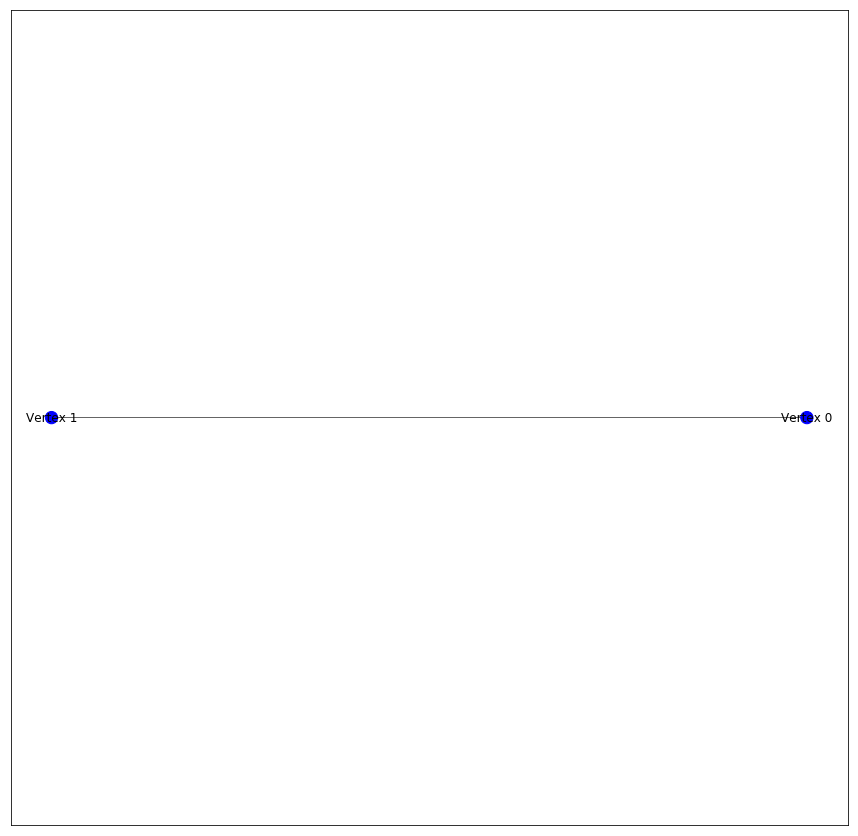

"NON-GROWTH"
Largest component size: [20]
graph density: [0.24736842105263157], 

average path length: 1.931578947368421, 

diameter: 3, 

second eigenvalue: (1.3495121462995197+0j) 

total structural util: 7.925130208333334 

is bipartite: False 

avg nbor overlap: [10.55]



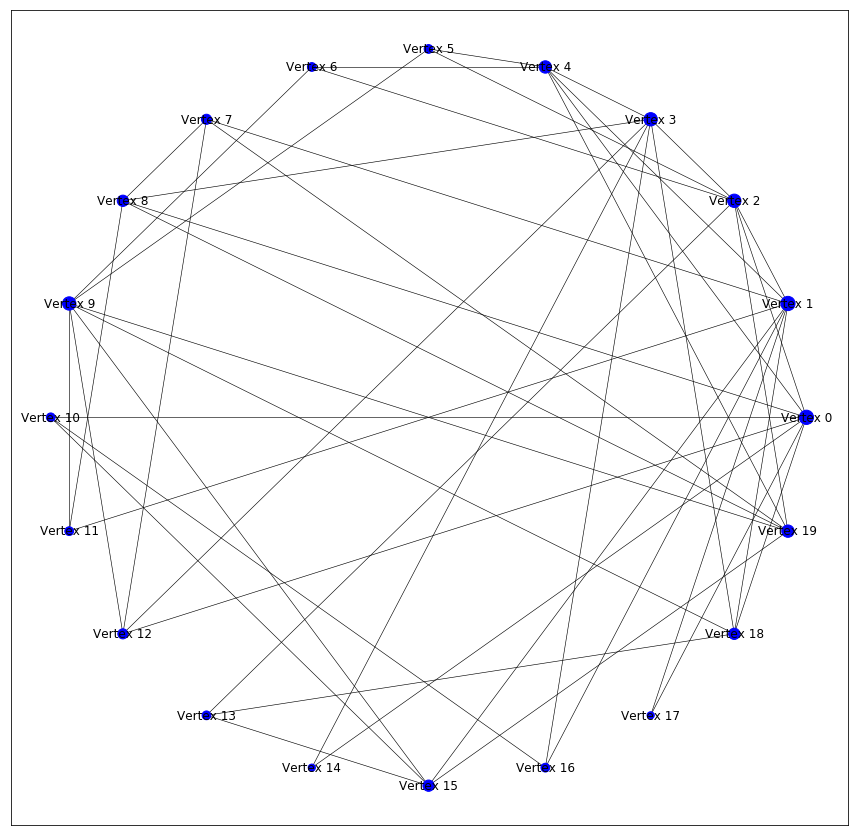

###########################
###########################
###########################
###########################
###########################
"GROWTH"
Largest component size: [7]
graph density: [1.0], 

average path length: 1.0, 

diameter: 1, 

second eigenvalue: (1.1666666666666665+0j) 

total structural util: 6.041015624999999 

is bipartite: False 

avg nbor overlap: [15.0]



/usr/local/lib/python3.6/dist-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1269: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  RuntimeWarning)


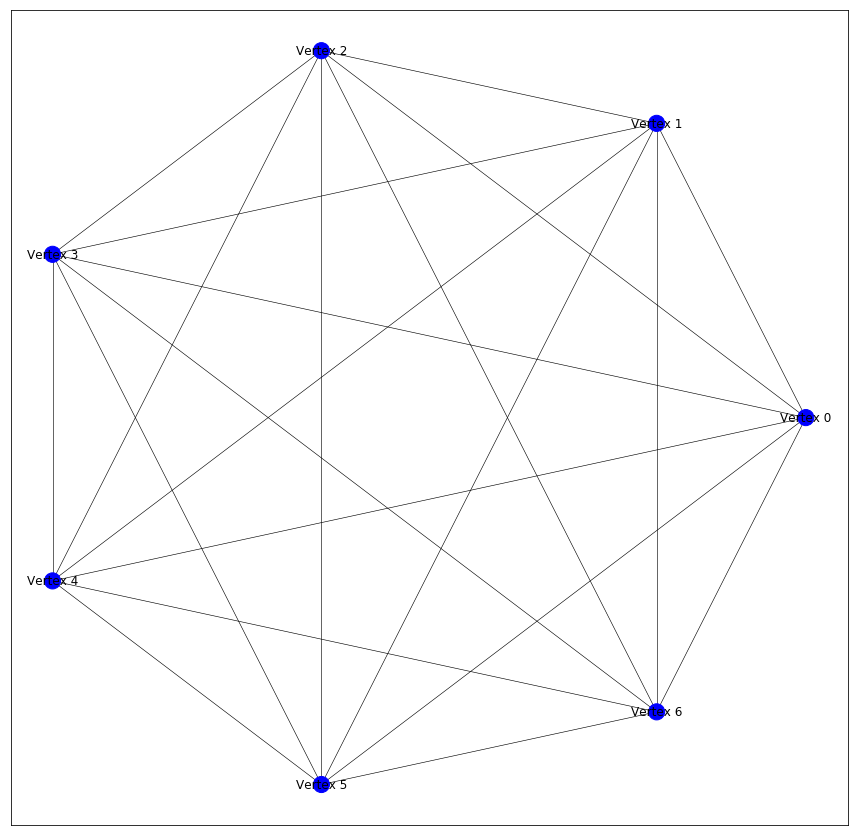

"NON-GROWTH"
Largest component size: [20]
graph density: [0.3526315789473684], 

average path length: 1.6473684210526316, 

diameter: 2, 

second eigenvalue: (1.1294057773437596+0j) 

total structural util: 11.297526041666666 

is bipartite: False 

avg nbor overlap: [20.15]



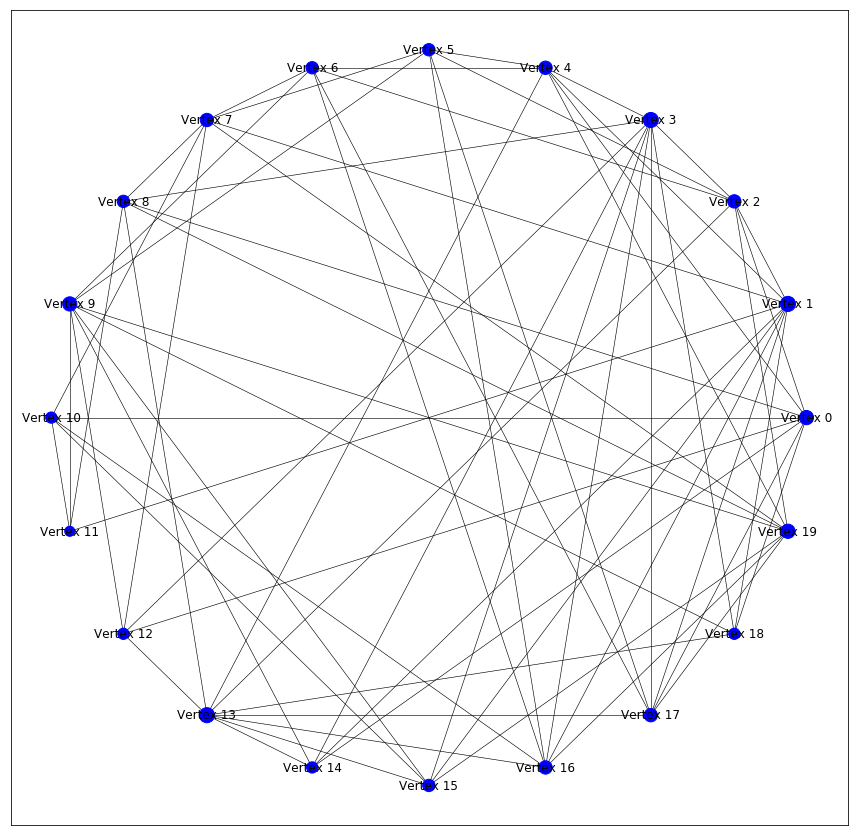

###########################
###########################
"GROWTH"
Largest component size: [12]
graph density: [0.5909090909090909], 

average path length: 1.4090909090909092, 

diameter: 2, 

second eigenvalue: (1.1428571428571435+0j) 

total structural util: 6.576171874999999 

is bipartite: False 

avg nbor overlap: [20.583333333333332]



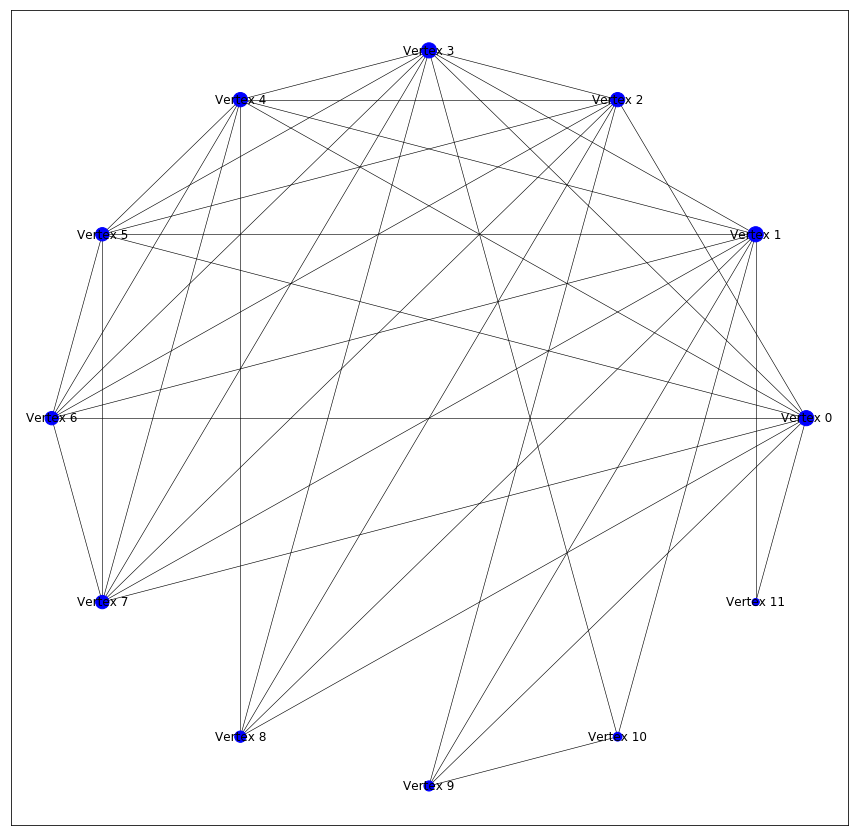

"NON-GROWTH"
Largest component size: [20]
graph density: [0.3526315789473684], 

average path length: 1.6473684210526316, 

diameter: 2, 

second eigenvalue: (1.1294057773437582+0j) 

total structural util: 11.297526041666666 

is bipartite: False 

avg nbor overlap: [20.15]



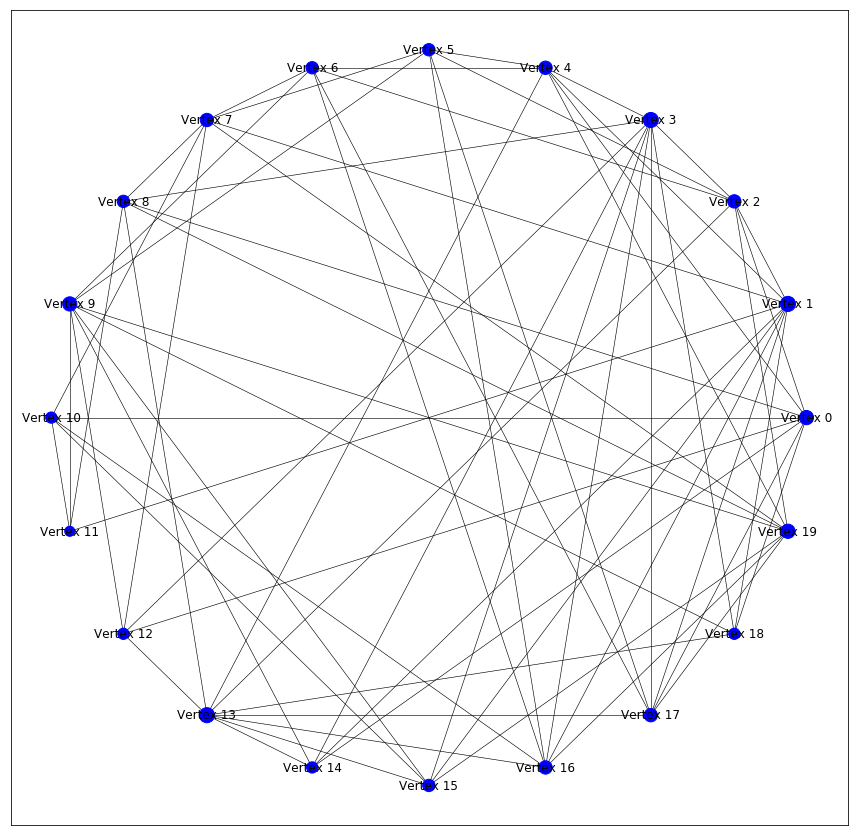

###########################
"GROWTH"
Largest component size: [17]
graph density: [0.4117647058823529], 

average path length: 1.588235294117647, 

diameter: 2, 

second eigenvalue: (1.1428571428571426+0j) 

total structural util: 9.442708333333332 

is bipartite: False 

avg nbor overlap: [20.294117647058822]



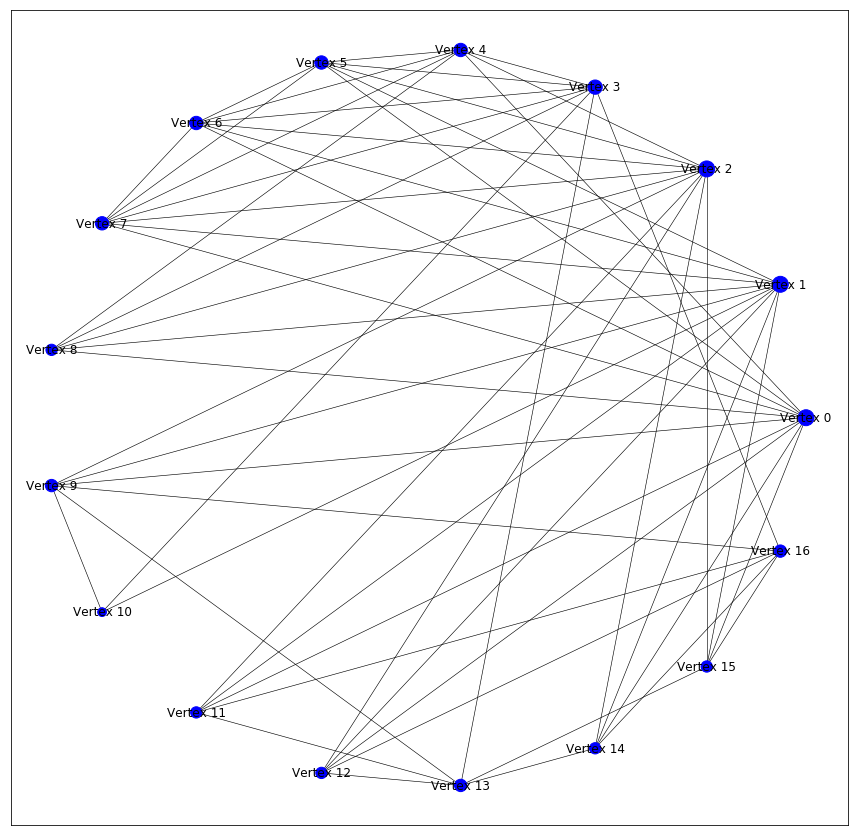

"NON-GROWTH"
Largest component size: [20]
graph density: [0.3526315789473684], 

average path length: 1.6473684210526316, 

diameter: 2, 

second eigenvalue: (1.1294057773437591+0j) 

total structural util: 11.297526041666666 

is bipartite: False 

avg nbor overlap: [20.15]



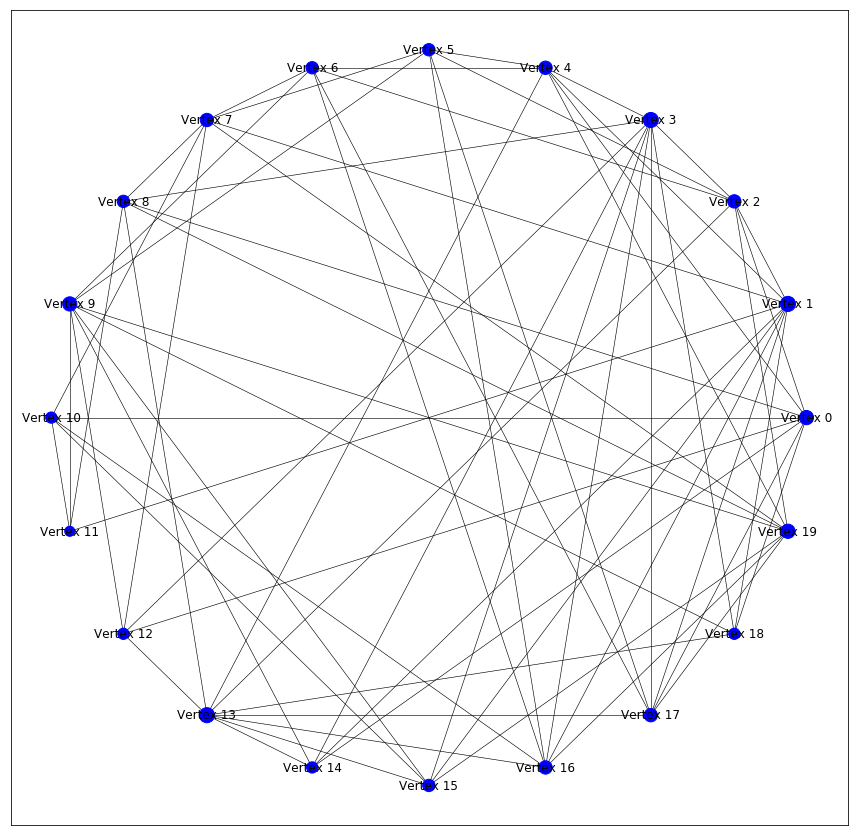

"GROWTH"
Largest component size: [20]
graph density: [0.3894736842105263], 

average path length: 1.6105263157894736, 

diameter: 2, 

second eigenvalue: (1.107667039467578+0j) 

total structural util: 12.47786458333333 

is bipartite: False 

avg nbor overlap: [25.75]



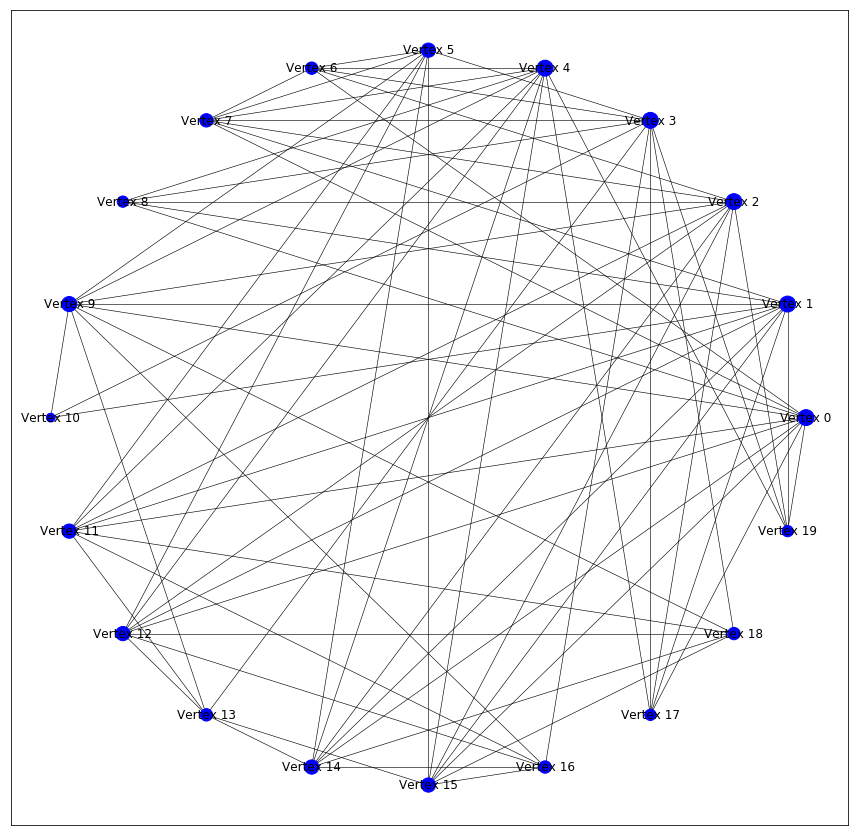

"NON-GROWTH"
Largest component size: [20]
graph density: [0.3526315789473684], 

average path length: 1.6473684210526316, 

diameter: 2, 

second eigenvalue: (1.1294057773437602+0j) 

total structural util: 11.297526041666666 

is bipartite: False 

avg nbor overlap: [20.15]



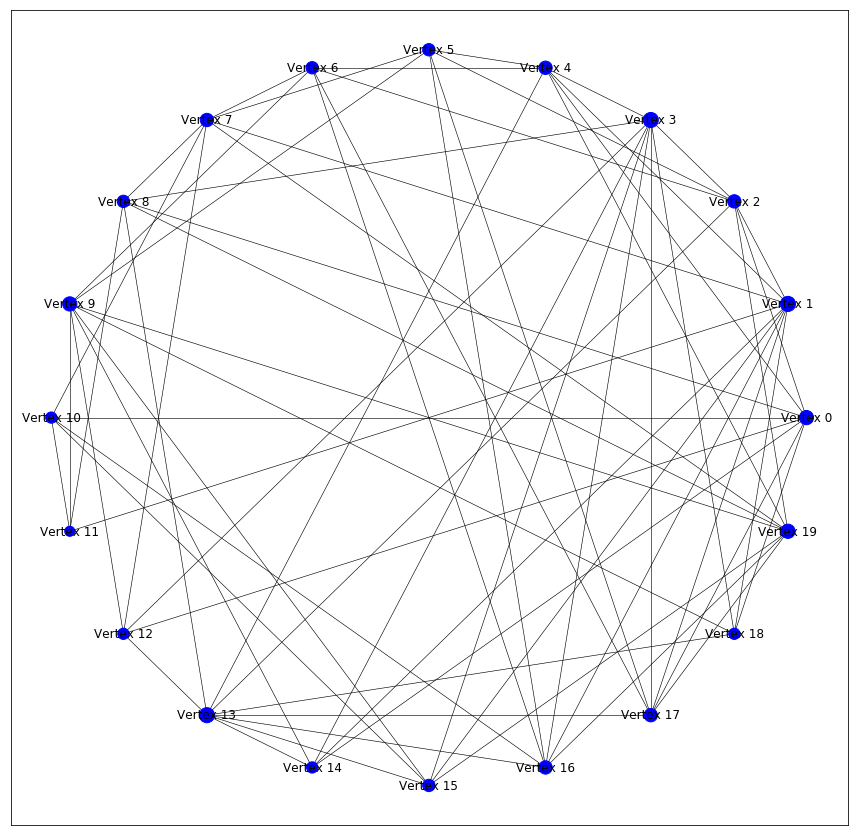

"GROWTH"
Largest component size: [20]
graph density: [0.3894736842105263], 

average path length: 1.6105263157894736, 

diameter: 2, 

second eigenvalue: (1.107667039467578+0j) 

total structural util: 12.47786458333333 

is bipartite: False 

avg nbor overlap: [25.75]



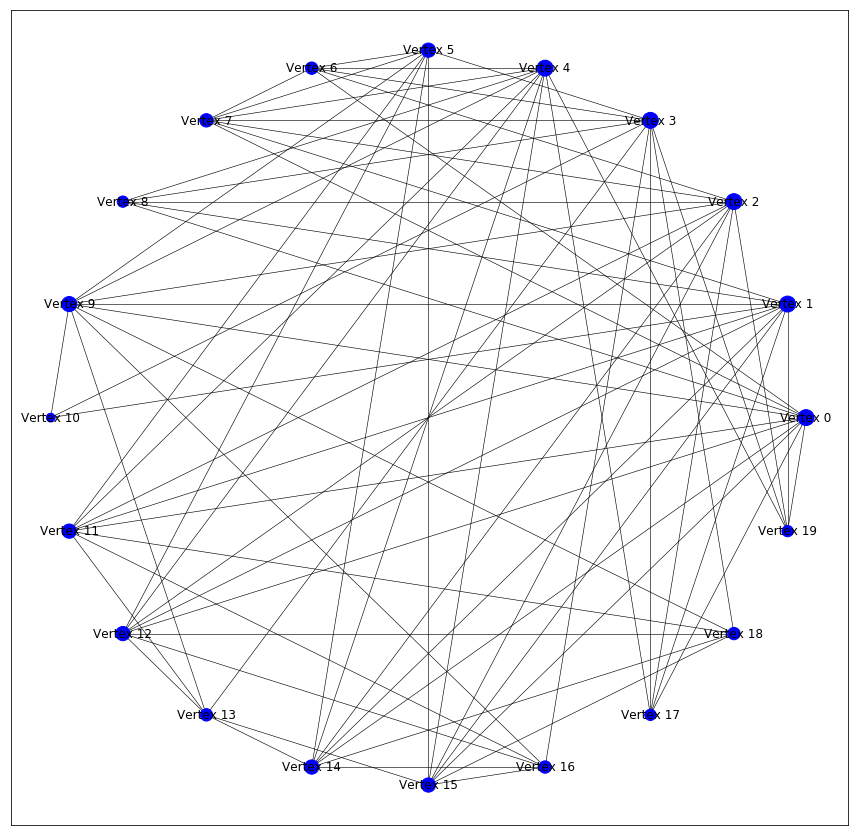

"NON-GROWTH"
Largest component size: [20]
graph density: [0.3526315789473684], 

average path length: 1.6473684210526316, 

diameter: 2, 

second eigenvalue: (1.129405777343756+0j) 

total structural util: 11.297526041666666 

is bipartite: False 

avg nbor overlap: [20.15]



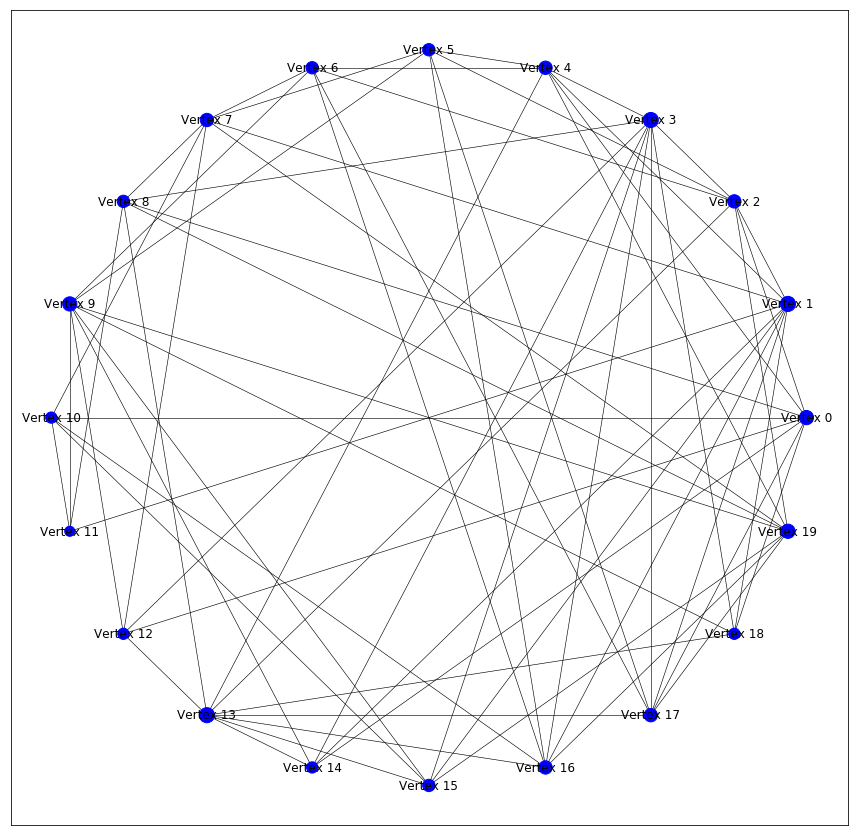

"GROWTH"
Largest component size: [20]
graph density: [0.3894736842105263], 

average path length: 1.6105263157894736, 

diameter: 2, 

second eigenvalue: (1.1076670394675787+0j) 

total structural util: 12.47786458333333 

is bipartite: False 

avg nbor overlap: [25.75]



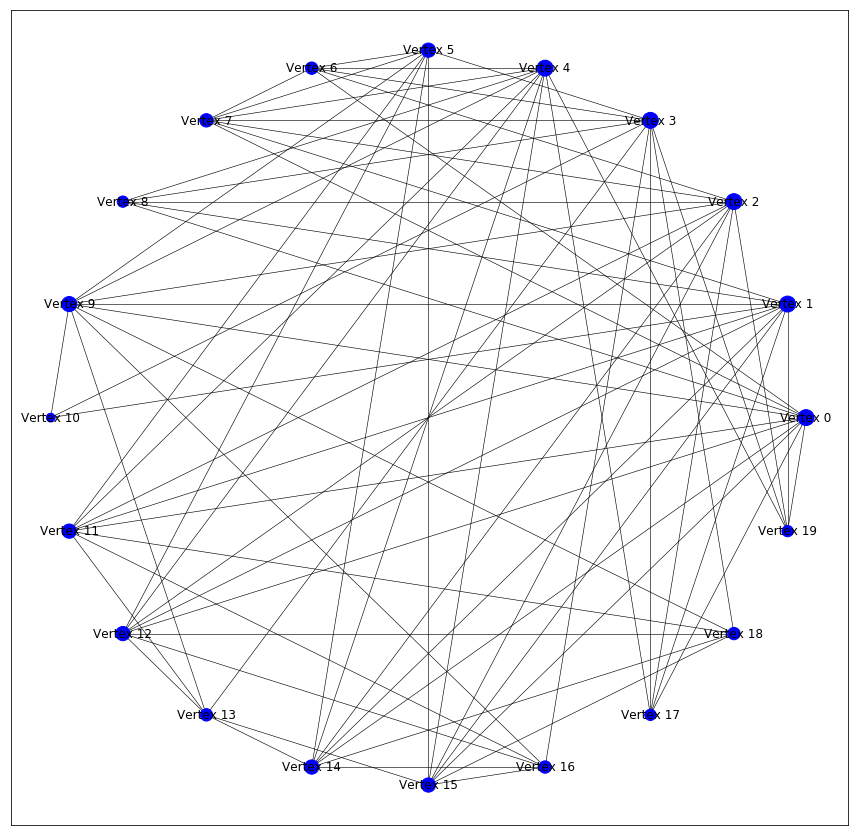

"NON-GROWTH"
Largest component size: [20]
graph density: [0.3526315789473684], 

average path length: 1.6473684210526316, 

diameter: 2, 

second eigenvalue: (1.1294057773437567+0j) 

total structural util: 11.297526041666666 

is bipartite: False 

avg nbor overlap: [20.15]



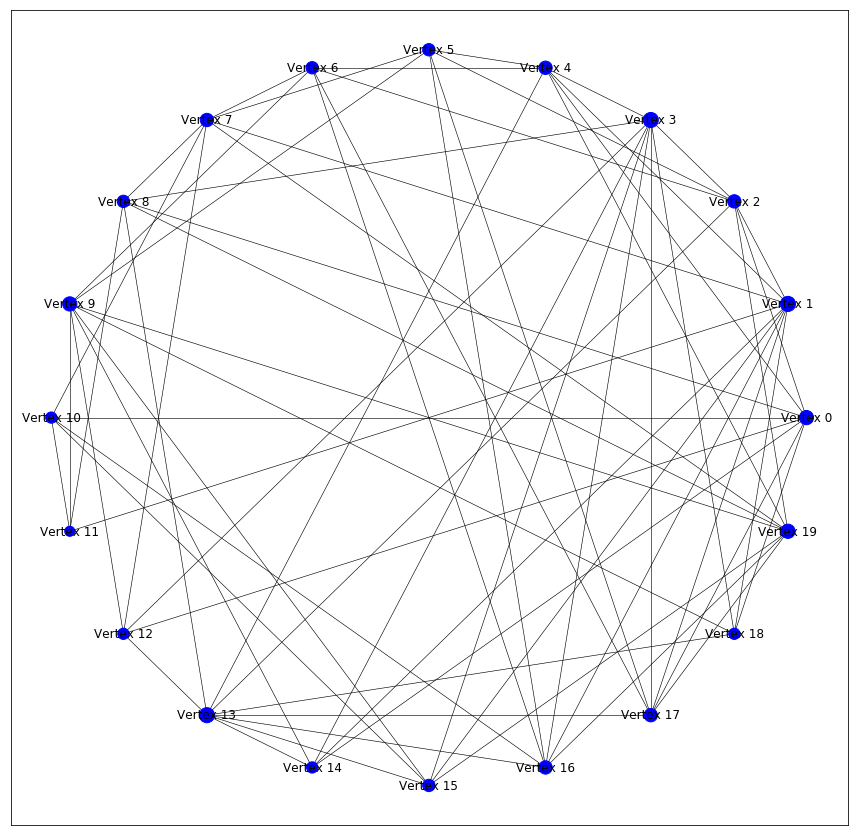

"GROWTH"
Largest component size: [20]
graph density: [0.3894736842105263], 

average path length: 1.6105263157894736, 

diameter: 2, 

second eigenvalue: (1.1076670394675783+0j) 

total structural util: 12.47786458333333 

is bipartite: False 

avg nbor overlap: [25.75]



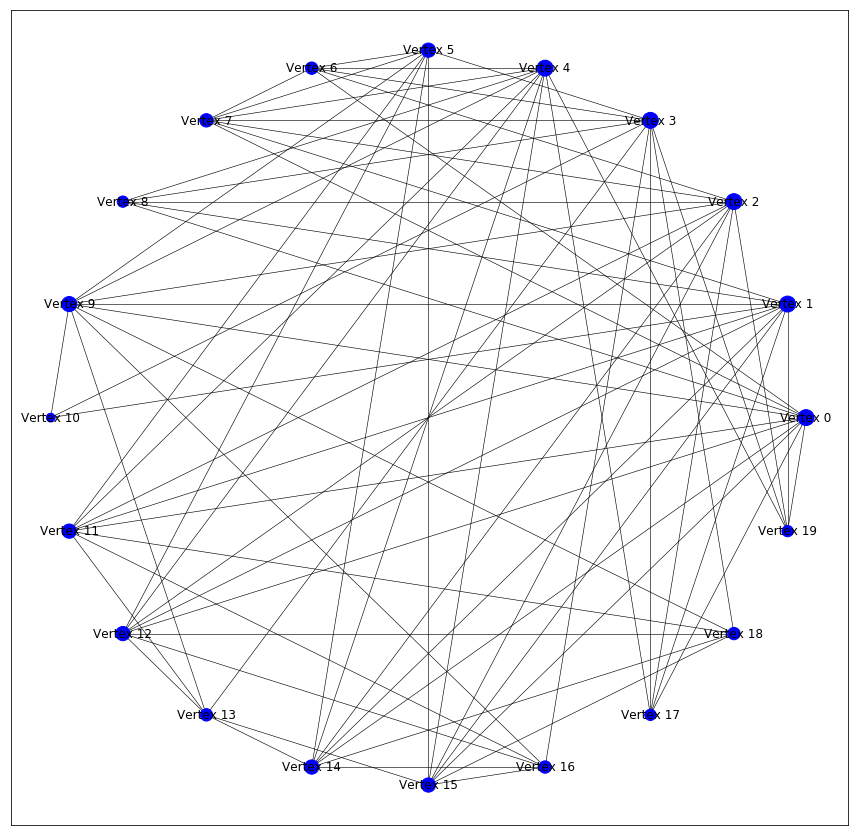

"NON-GROWTH"
Largest component size: [20]
graph density: [0.3526315789473684], 

average path length: 1.6473684210526316, 

diameter: 2, 

second eigenvalue: (1.1294057773437594+0j) 

total structural util: 11.297526041666666 

is bipartite: False 

avg nbor overlap: [20.15]



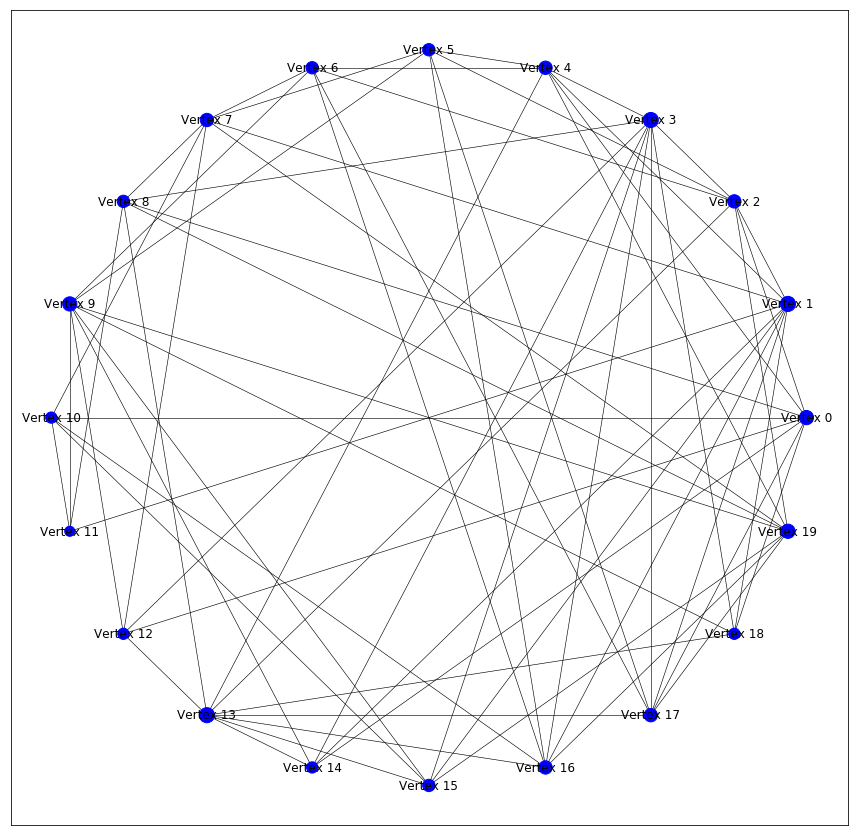

"GROWTH"
Largest component size: [20]
graph density: [0.3894736842105263], 

average path length: 1.6105263157894736, 

diameter: 2, 

second eigenvalue: (1.1076670394675787+0j) 

total structural util: 12.47786458333333 

is bipartite: False 

avg nbor overlap: [25.75]



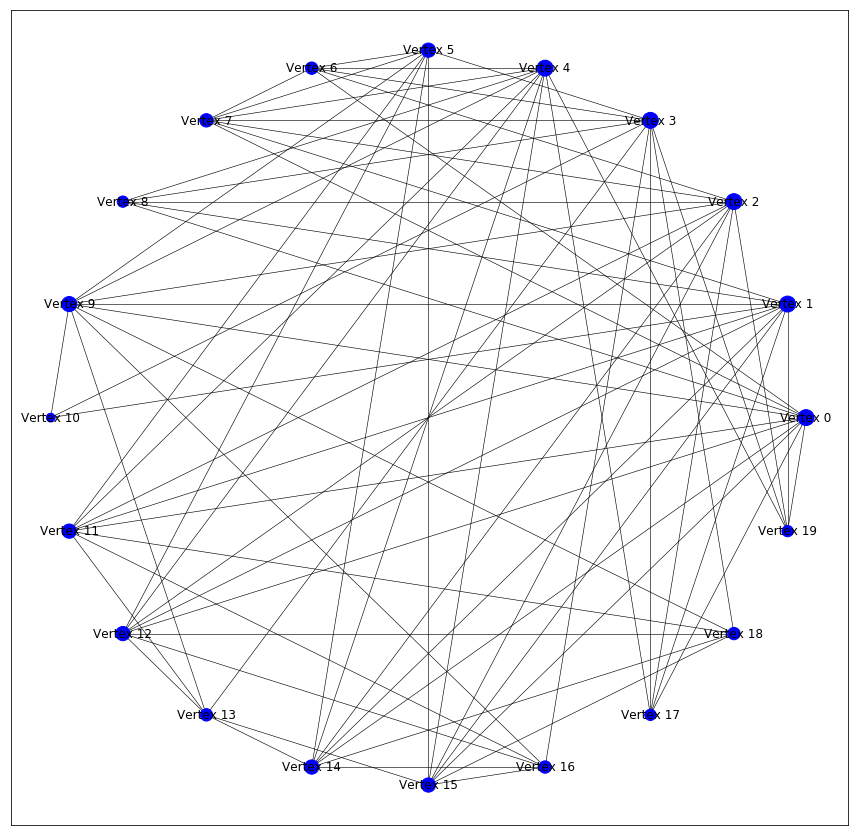

"NON-GROWTH"
Largest component size: [20]
graph density: [0.3526315789473684], 

average path length: 1.6473684210526316, 

diameter: 2, 

second eigenvalue: (1.129405777343759+0j) 

total structural util: 11.297526041666666 

is bipartite: False 

avg nbor overlap: [20.15]



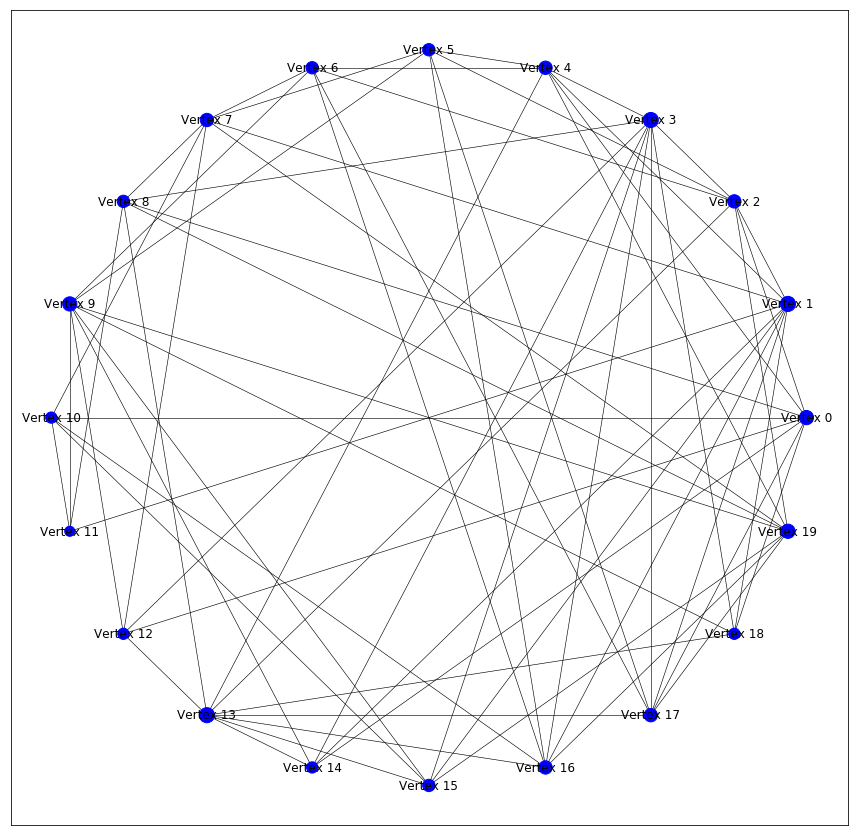

"GROWTH"
Largest component size: [20]
graph density: [0.3894736842105263], 

average path length: 1.6105263157894736, 

diameter: 2, 

second eigenvalue: (1.1076670394675796+0j) 

total structural util: 12.47786458333333 

is bipartite: False 

avg nbor overlap: [25.75]



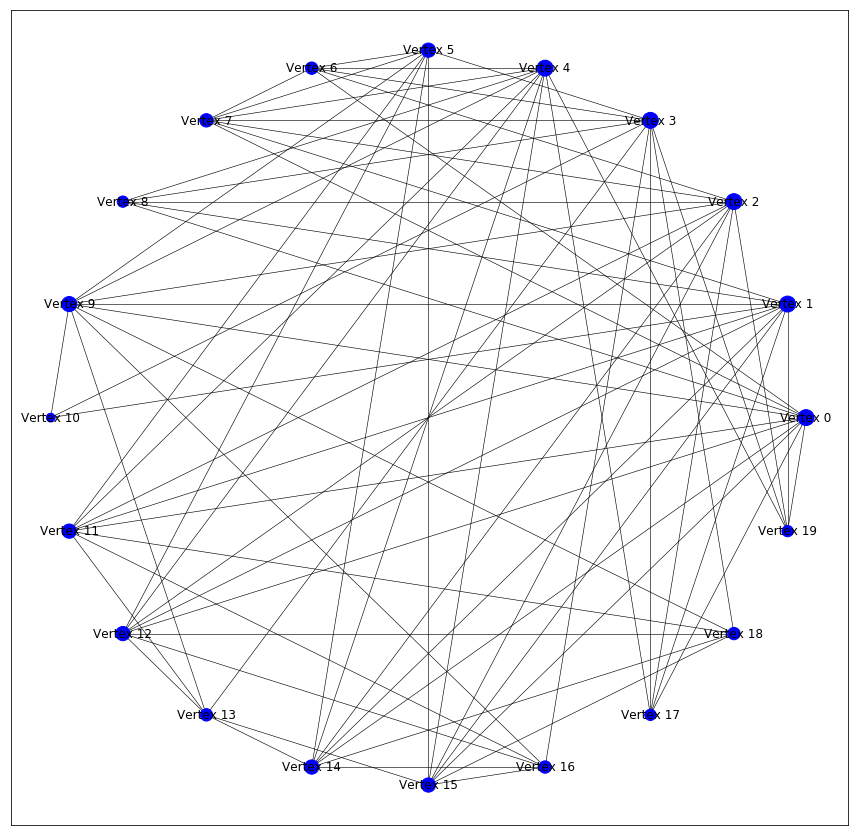

"NON-GROWTH"
Largest component size: [20]
graph density: [0.3526315789473684], 

average path length: 1.6473684210526316, 

diameter: 2, 

second eigenvalue: (1.1294057773437614+0j) 

total structural util: 11.297526041666666 

is bipartite: False 

avg nbor overlap: [20.15]



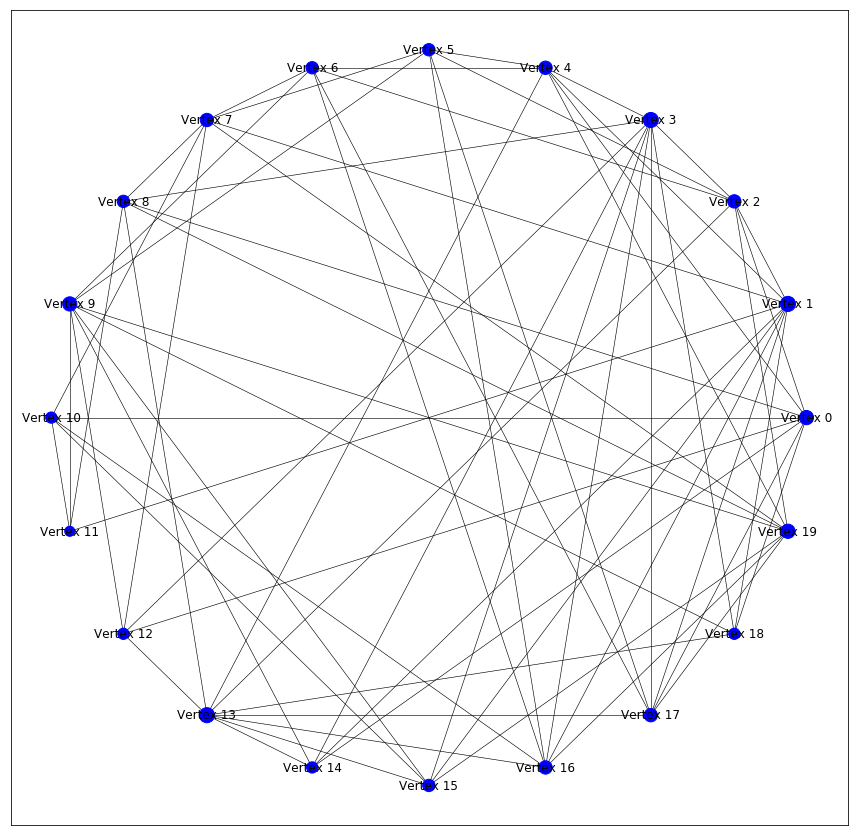

"GROWTH"
Largest component size: [20]
graph density: [0.3894736842105263], 

average path length: 1.6105263157894736, 

diameter: 2, 

second eigenvalue: (1.107667039467579+0j) 

total structural util: 12.47786458333333 

is bipartite: False 

avg nbor overlap: [25.75]



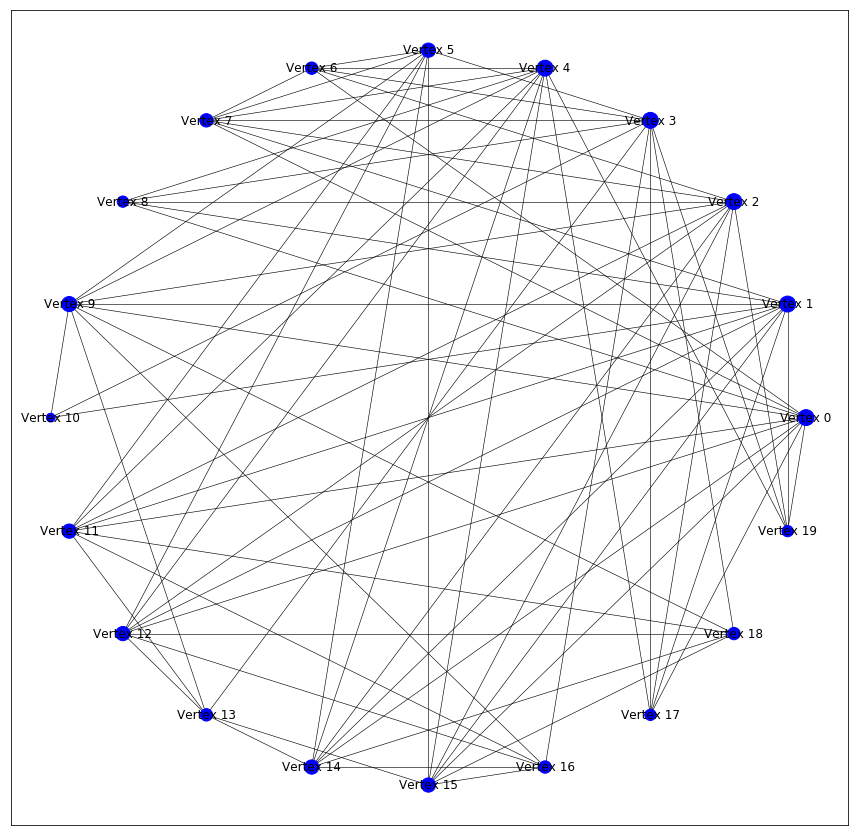

"NON-GROWTH"
Largest component size: [20]
graph density: [0.3526315789473684], 

average path length: 1.6473684210526316, 

diameter: 2, 

second eigenvalue: (1.1294057773437596+0j) 

total structural util: 11.297526041666666 

is bipartite: False 

avg nbor overlap: [20.15]



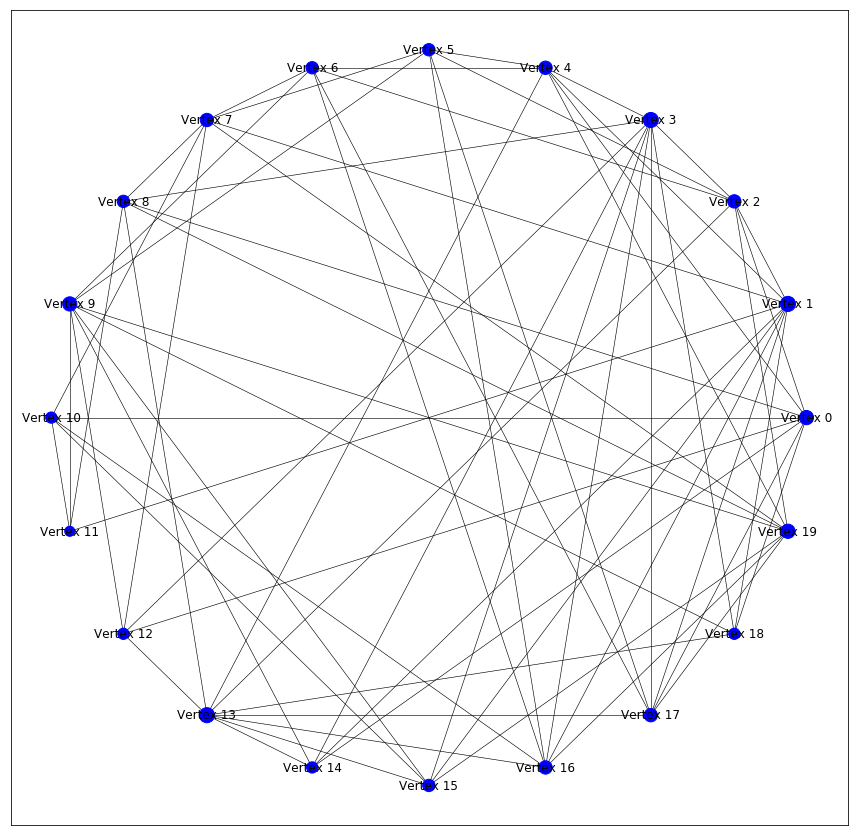

"GROWTH"
Largest component size: [20]
graph density: [0.3894736842105263], 

average path length: 1.6105263157894736, 

diameter: 2, 

second eigenvalue: (1.1076670394675783+0j) 

total structural util: 12.47786458333333 

is bipartite: False 

avg nbor overlap: [25.75]



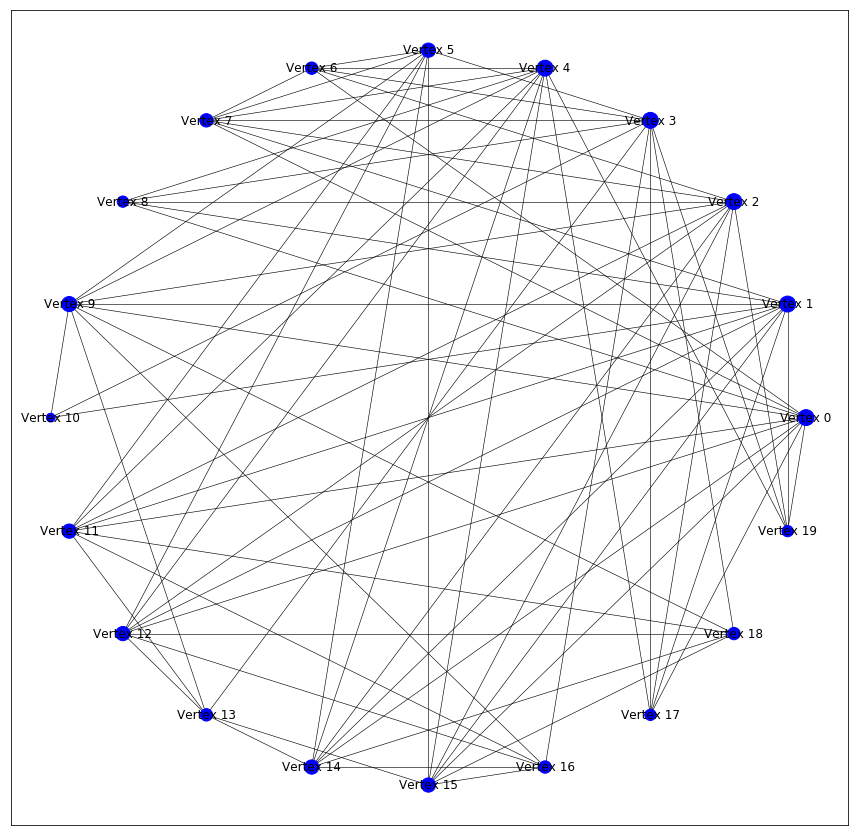

"NON-GROWTH"
Largest component size: [20]
graph density: [0.3526315789473684], 

average path length: 1.6473684210526316, 

diameter: 2, 

second eigenvalue: (1.1294057773437594+0j) 

total structural util: 11.297526041666666 

is bipartite: False 

avg nbor overlap: [20.15]



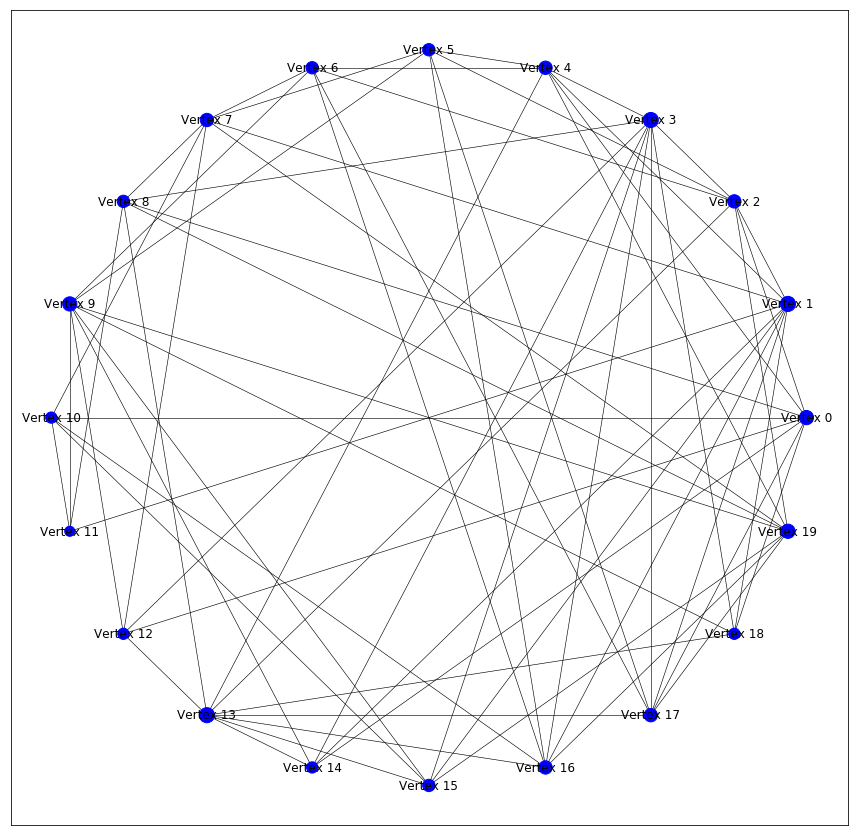

"GROWTH"
Largest component size: [20]
graph density: [0.3894736842105263], 

average path length: 1.6105263157894736, 

diameter: 2, 

second eigenvalue: (1.1076670394675783+0j) 

total structural util: 12.47786458333333 

is bipartite: False 

avg nbor overlap: [25.75]



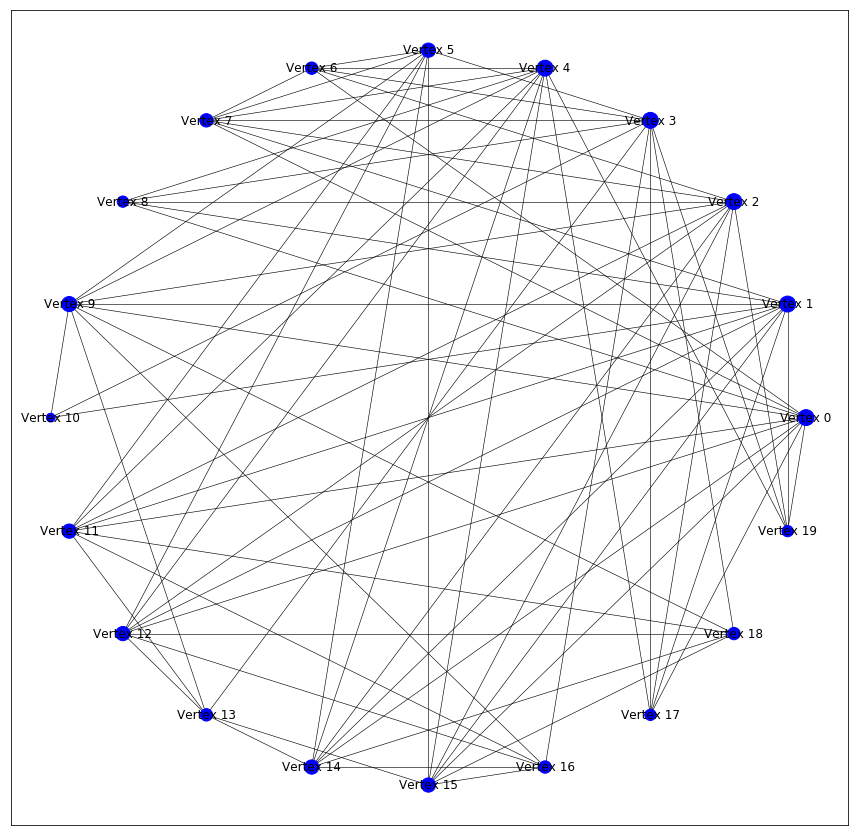

"NON-GROWTH"
Largest component size: [20]
graph density: [0.3526315789473684], 

average path length: 1.6473684210526316, 

diameter: 2, 

second eigenvalue: (1.1294057773437591+0j) 

total structural util: 11.297526041666666 

is bipartite: False 

avg nbor overlap: [20.15]



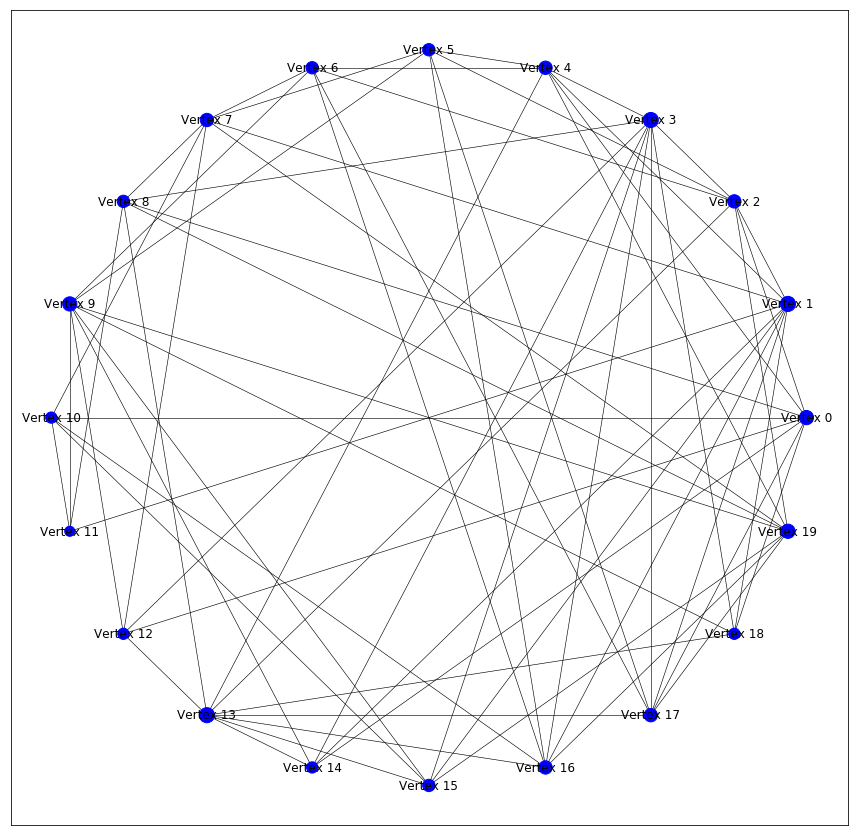

In [4]:
_N_final = 20

# Simul + some vis parameters
num_iters = 50
show_last = 3
show_every = 5
log_every = 0
log_last = 0

# Non-growth
G_ng = attribute_network(_N_final, params)

# Growth
G_g = attribute_network(1, params)

def run_simul_step(G):
    calc_edges(G)
    simul_random_walk(G)
    for v in [ v for v in G.vertices if v.degree == 0 ]:
        attr_util.indep_context_proposal(G, v)

for itr in range(num_iters):
    if itr < _N_final - 1:
        add_attr_graph_vtx(G_g)
        
    meets_log = log_every != 0 and ((itr % log_every == 0) or (itr >= num_iters - log_last))
    if meets_log:
        G_g.sim_params['edge_selection'] = attr_util.seq_edge_sel_logged
        G_ng.sim_params['edge_selection'] = attr_util.seq_edge_sel_logged
    else:
        G_g.sim_params['edge_selection'] = attr_util.seq_edge_sel_silent
        G_ng.sim_params['edge_selection'] = attr_util.seq_edge_sel_silent
        
    run_simul_step(G_g)
    run_simul_step(G_ng)
    
    meets_show = (itr % show_every == 0) or (itr >= num_iters - show_last)
    if meets_show:
        print("\x1b[95m\"GROWTH\"\x1b[0m")
        print_metrics(G_g)
        vis.draw_graph(G_g)
        
        print("\x1b[95m\"NON-GROWTH\"\x1b[0m")
        print_metrics(G_ng)
        vis.draw_graph(G_ng)

plt.show()